In [1]:
from scipy import misc
import numpy as np
import os
import  matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn import metrics

# Loading Dataset

In [2]:
# covert image to sole vector
def img2vector(filename):
    imgVector = mpimg.imread(filename).flatten()
    return imgVector.astype(np.float)

# load image from diretion
def loadimage(dataSetDir):
    X = np.zeros((400, 10305))  # image size:112*92
    k = 0
    for i in range(1,41): #40 sample people
            for j in range(1,11): #everyone has 10 different face
                    filename = dataSetDir+'/s'+str(i)+'/'+str(j)+'.pgm'
                    img = img2vector(filename)
                    X[k,:10304] = img
                    X[k,10304] = i
                    k=k+1                    
    return X

In [3]:
X = loadimage(os.getcwd()+'/Faces')
y = X[:,10304]
X = X[:,:10304]
print(X.shape)
print(y.shape)

(400, 10304)
(400,)


# Splitting Data Set

In [4]:
def splitData(type):
    if(type==1):
        #50-50% split
        X_train = X[1::2]
        X_test = X[::2]
        y_train = y[1::2]
        y_test = y[::2]
    elif(type==2):
        #700-30% split
        low = 0
        high = 7

        X_train = []
        y_train = []
        X_test = []
        y_test = []

        for i in range(0, len(X), 10):
          # Train Data
          X_train.append(X[low:high, :])
          y_train.extend(y[low:high])

          # Test Data
          X_test.append(X[high:high+3, :])
          y_test.append(y[high:high+3])

          low += 10
          high += 10

        # Training Data
        X_train = np.array(X_train)
        X_train = np.vstack(X_train)

        y_train = np.array(y_train)
        y_train = np.hstack(y_train)

        # Testing Data
        X_test = np.array(X_test)
        X_test = np.vstack(X_test)

        y_test = np.array(y_test)
        y_test = np.hstack(y_test)
    return X_train,X_test,y_train,y_test


In [5]:
X_train,X_test,y_train,y_test = splitData(1)

# Displaying Data

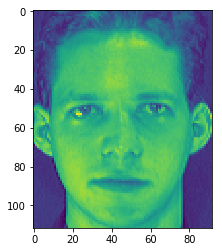

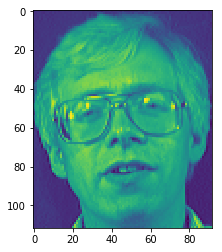

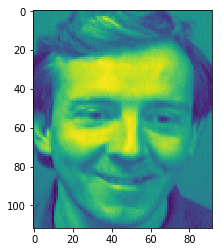

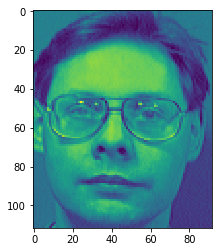

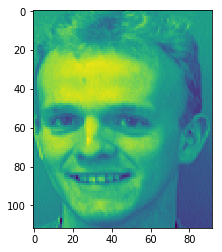

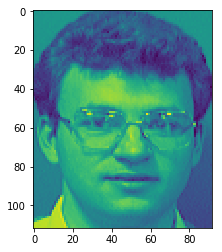

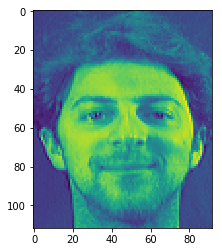

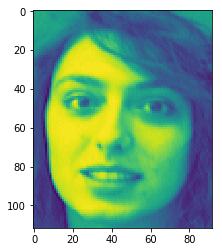

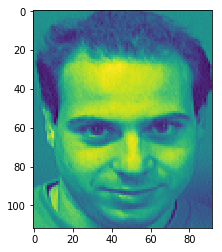

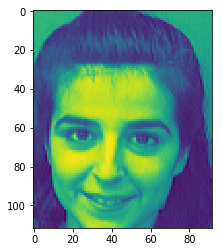

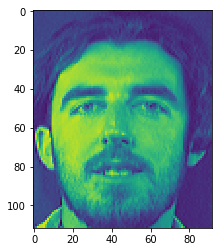

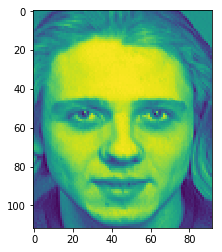

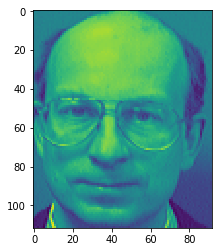

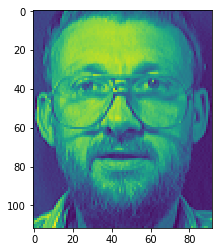

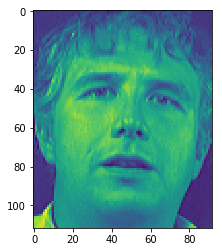

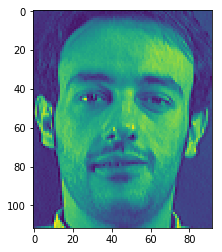

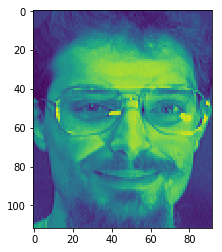

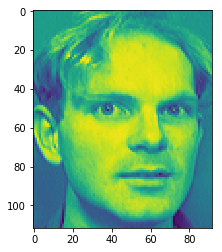

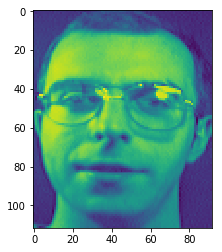

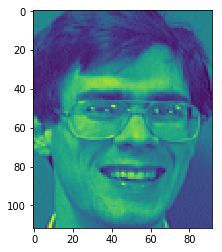

In [6]:
imgs = []
for i in range(20):
    plt.figure(i)                # the first figure
    imgs.append(X[10*i,:].reshape(112,92))
    plt.imshow(imgs[i])
    plt.show()

# Mean Normalization

In [9]:
mean = X_train.mean(axis=0).reshape(1,X_train.shape[1])
print(np.ones((X_train.shape[0],1)).shape)
print(mean.shape)
mean_matrix1 = np.ones((X_train.shape[0],1)).dot(mean)
mean_matrix2 = np.ones((X_test.shape[0],1)).dot(mean)

minmax = np.zeros((1,X_train.shape[1]))
for i in range(X_train.shape[1]):
    minmax[0,i] = max(X_train[:,i]) - min(X_train[:,i])
    
minmax_matrix1 = np.ones((X_train.shape[0],1)).dot(minmax)
minmax_matrix2 = np.ones((X_test.shape[0],1)).dot(minmax)

X_train = np.divide(X_train-mean_matrix1,minmax_matrix1)
X_test = np.divide(X_test-mean_matrix2,minmax_matrix2)

(200, 1)
(1, 10304)


In [8]:
alpha = np.arange(0.8,1.0,0.05)
alpha2 = np.arange(0.0,1.0,0.05)
print(alpha)
print(alpha2)

[0.8  0.85 0.9  0.95]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]


# Dimensionality Reduction Using Dimensionality Trick
$$A^TA(A^Tv) =\lambda.(A^Tv)$$

In [9]:
M = np.dot(X_train,X_train.T)
eig_vals,eig_vecs = np.linalg.eigh(M)
V = np.dot(X_train.T,eig_vecs).T
V = V[::-1]
S = np.zeros((X_train.shape[0]))
for i in range(X_train.shape[0]):
    if(eig_vals[i] > 0):
        S[i] = np.sqrt(eig_vals[i])
    else:
        S[i] = -1*np.sqrt(eig_vals[i]*-1)
S = S[::-1]
eig_vals = eig_vals[::-1]
##Every eigen vector is stretched by lambda^(1/2)
for i in range(V.shape[1]):
     V[:,i] /= S 
V = V.T
idx = eig_vals.argsort()[::-1][:X_train.shape[0]] #sort in descending order with respect to eigen values
eig_vals = eig_vals[idx]
V = V[:,idx]
print(M.shape)
print(V.shape)
print(np.linalg.norm(V[:,0]))

(200, 200)
(10304, 200)
0.9999999999999999


## Calculate Number of Dimensions Needed To Explain X% of Variance

In [10]:
explained_variance_ratio = [] #this represent the amount of variance each eigenvector explains in precentage
eig_values_sum = np.sum(eig_vals[0:])
for i in range(X_train.shape[0]):
    explained_variance_ratio.append(eig_vals[i]/eig_values_sum)
# accumulative sum of the variance_ratio
cumsum = np.cumsum(explained_variance_ratio)

Number of Dimensions for alpha =  0.0 =  1
Number of Dimensions for alpha =  0.05 =  1
Number of Dimensions for alpha =  0.1 =  1
Number of Dimensions for alpha =  0.15000000000000002 =  1
Number of Dimensions for alpha =  0.2 =  2
Number of Dimensions for alpha =  0.25 =  2
Number of Dimensions for alpha =  0.30000000000000004 =  2
Number of Dimensions for alpha =  0.35000000000000003 =  3
Number of Dimensions for alpha =  0.4 =  4
Number of Dimensions for alpha =  0.45 =  5
Number of Dimensions for alpha =  0.5 =  6
Number of Dimensions for alpha =  0.55 =  7
Number of Dimensions for alpha =  0.6000000000000001 =  10
Number of Dimensions for alpha =  0.65 =  13
Number of Dimensions for alpha =  0.7000000000000001 =  18
Number of Dimensions for alpha =  0.75 =  25
Number of Dimensions for alpha =  0.8 =  35
Number of Dimensions for alpha =  0.8500000000000001 =  51
Number of Dimensions for alpha =  0.9 =  75
Number of Dimensions for alpha =  0.9500000000000001 =  115


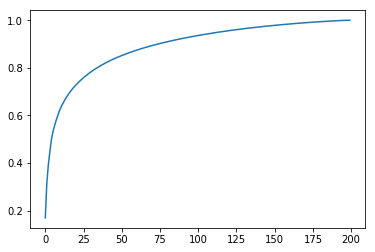

In [11]:
dimensions = []
for i in alpha2:
    d = np.argmax(cumsum >= i) + 1
    dimensions.append(d)
    print('Number of Dimensions for alpha = ',i,'= ',d)

plt.plot(cumsum)

## Display Eigenfaces

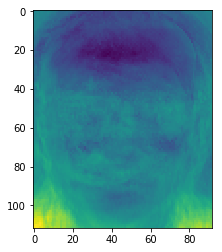

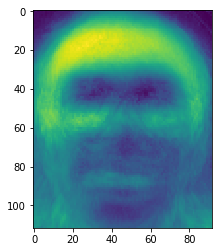

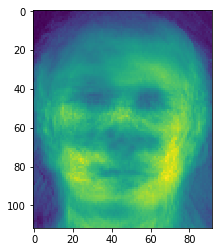

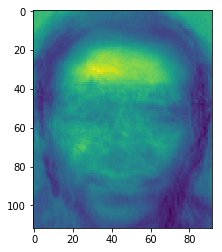

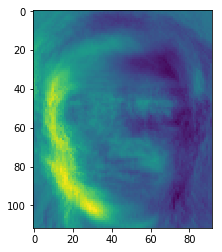

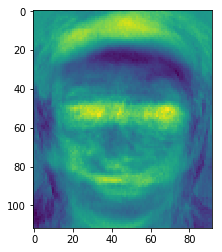

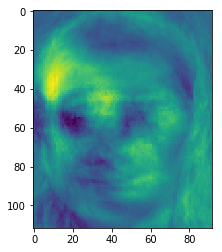

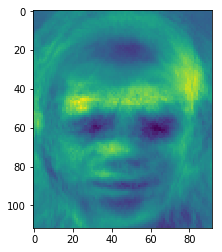

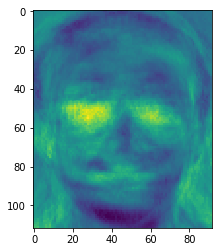

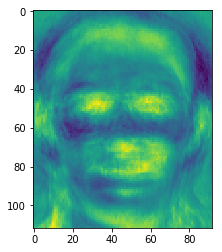

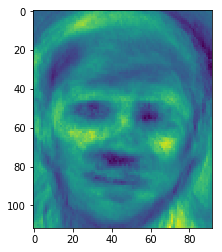

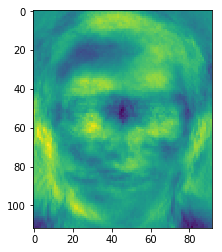

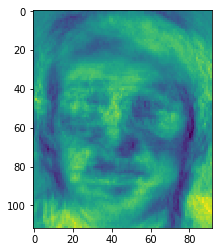

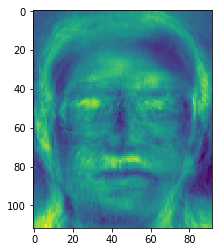

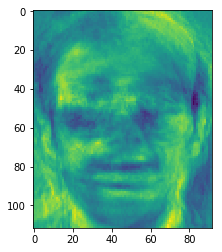

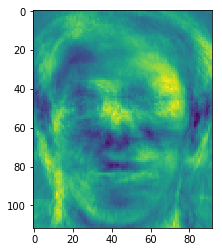

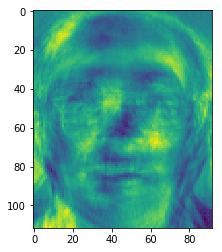

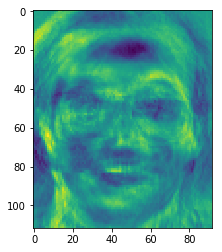

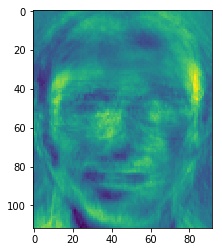

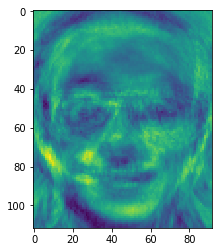

20


In [12]:
imgs2 = []
for i in range(20):
    plt.figure(i)                # the first figure
    imgs2.append(V[:,i].reshape(112,92).real)
    plt.imshow(imgs2[i])
    plt.show()
print(len(imgs2))

## Get The Matrix u with d dimensions that explains X% of total variance

In [13]:
U2_alpha = []
for i in dimensions:
    U2_alpha.append(V[:,:i])

Best Accuracy Using Alpha =  94.0
Best Dimension =  51
For alpha = 0.05 Accuracy = 0.15
For alpha = 0.1 Accuracy = 0.15
For alpha = 0.15000000000000002 Accuracy = 0.15
For alpha = 0.2 Accuracy = 0.15
For alpha = 0.25 Accuracy = 0.425
For alpha = 0.30000000000000004 Accuracy = 0.425
For alpha = 0.35000000000000003 Accuracy = 0.425
For alpha = 0.4 Accuracy = 0.705
For alpha = 0.45 Accuracy = 0.815
For alpha = 0.5 Accuracy = 0.82
For alpha = 0.55 Accuracy = 0.855
For alpha = 0.6000000000000001 Accuracy = 0.865
For alpha = 0.65 Accuracy = 0.895
For alpha = 0.7000000000000001 Accuracy = 0.91
For alpha = 0.75 Accuracy = 0.92
For alpha = 0.8 Accuracy = 0.91
For alpha = 0.8500000000000001 Accuracy = 0.935
For alpha = 0.9 Accuracy = 0.94
For alpha = 0.9500000000000001 Accuracy = 0.94
[0.94, 0.86, 0.835, 0.76]


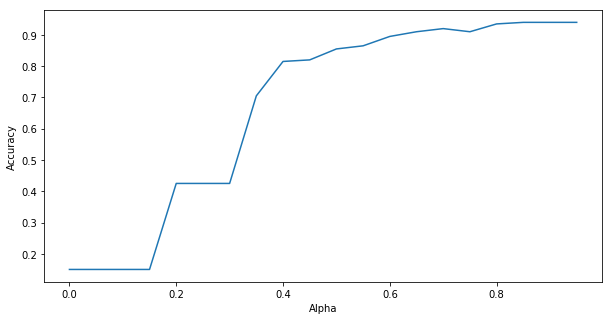

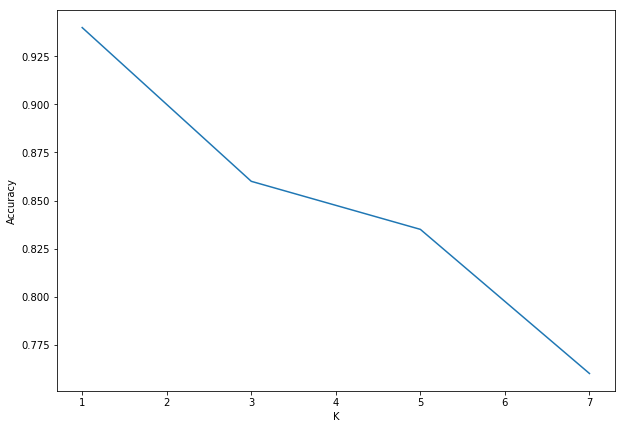

In [14]:
ys2 = []
ys22 = []
k = [1,3,5,7]
ys_max = []
k_acc = []
for i in k:
    for u in U2_alpha:
        model = KNeighborsClassifier(n_neighbors=i)
        X_train_reduced = X_train.dot(u)
        X_test_reduced = X_test.dot(u)
        model.fit(X_train_reduced,np.ravel(y_train))
        y_test_predc = model.predict(X_test_reduced)
        ys2.append(metrics.accuracy_score(y_test, y_test_predc))
        ys_max.append(metrics.accuracy_score(y_test, y_test_predc))
    if(i==1):
        print('Best Accuracy Using Alpha = ',max(ys2)*100)
        print('Best Dimension = ',U2_alpha[ys2.index(max(ys2))].shape[1])
        plt.figure(figsize=(10,5))
        plt.plot(alpha2,ys2)
        plt.xlabel('Alpha')
        plt.ylabel('Accuracy')
        for j in range(len(alpha2)-1):
            print('For alpha =',alpha2[j+1],'Accuracy =',ys2[j])
    ys22.append(max(ys2))
    ys2.clear()
    k_acc.append(max(ys_max))
    ys_max.clear()

print(k_acc)
plt.figure(figsize=(10,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(k,ys22)

# Accuracy with respect to number of dimensions

In [15]:
ds = []
for i in range(1,400):
    ds.append(i)
U2_d = []
for i in range(1,400):
    U2_d.append(V[:,:i])
U2_d[0].shape

(10304, 1)

0.95
195


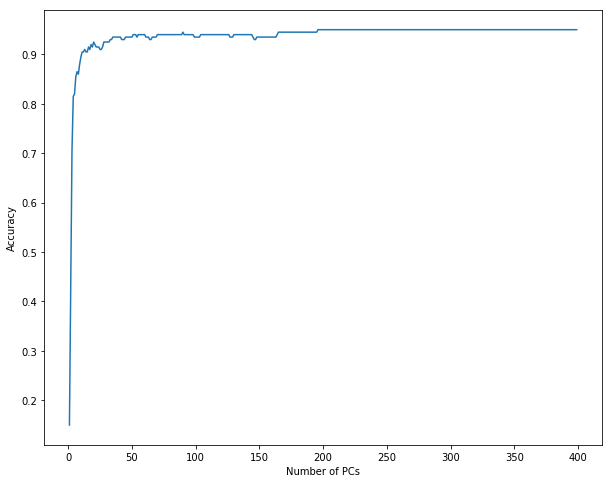

In [16]:
ys2 = []
ys22 = []
for u in U2_d:
    model = KNeighborsClassifier(n_neighbors=1)
    X_train_reduced = X_train.dot(u)
    X_test_reduced = X_test.dot(u)
    model.fit(X_train_reduced,np.ravel(y_train))
    y_test_predc = model.predict(X_test_reduced)
    ys2.append(metrics.accuracy_score(y_test, y_test_predc))

print(max(ys2))
print(ys2.index(max(ys2)))
plt.figure(figsize=(10,8))
plt.xlabel('Number of PCs')
plt.ylabel('Accuracy')
plt.plot(ds,ys2)